# Завершение кода

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
import sys
import scikeras


from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, ClassifierMixin

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Загружаем первый датасет (базальтопластик) и посмотрим на названия столбцов
df = pd.read_excel("Itog\itog.xlsx")
df.shape

(922, 15)

Прогнозируем модуль упругости при растяжении, ГПа

In [3]:
#разбиваем на тестовую, тренировочную выборки, выделяя предикторы и целевые переменные
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
    df[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)

In [4]:
# Проверка правильности разбивки
df_norm_n.shape[0] - x_train_2.shape[0] - x_test_2.shape[0]

0

In [5]:
x_train_2.head()

,Unnamed: 0.1,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
481,0.156444,0.156444,0.000515,0.574468,0.128874,0.020477,0.006099,0.069680,0.181471,0.748657,0.071227,0.000283,0.002229,0.015177
650,0.215475,0.215475,0.000410,0.587940,0.221451,0.025956,0.006996,0.071984,0.077478,0.704786,0.054136,0.000293,0.001286,0.017439
483,0.159163,0.159163,0.000565,0.570410,0.166143,0.042288,0.006892,0.094073,0.129399,0.752680,0.040423,0.000287,0.002192,0.018444
355,0.108012,0.108012,0.000901,0.539490,0.302537,0.024182,0.006533,0.069661,0.158041,0.748787,0.049559,0.000000,0.001753,0.012393
850,0.280412,0.280412,0.000526,0.546876,0.242346,0.031364,0.006902,0.082237,0.087759,0.680025,0.079257,0.000296,0.002539,0.015771


In [6]:
y_train_2

,"Модуль упругости при растяжении, ГПа"
481,69.573625
650,80.691499
483,71.887367
355,68.314525
850,72.997468
...,...
106,74.519119
270,70.325533
860,77.995289
435,70.199234


In [7]:
y_train_2.shape

(645, 1)

In [8]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

In [9]:
#Проверка различных моделей при стандартных параметрах
# Метод опорных векторов - 1 

In [10]:
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr2.fit(x_train_2, np.ravel(y_train_2))
#вычисляем коэффициент детерминации
y_pred_svr2 = svr2.predict(x_test_2)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_2)
mse_svr_elast2 = mean_squared_error(y_test_2,y_pred_svr2)
print('Support Vector Regression Results Train:') 
print("Test score: {:.2f}".format(svr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Support Vector Regression Results:')
print('SVR_MAE:', round(mean_absolute_error(y_test_2, y_pred_svr2)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_svr2)))
print('SVR_MSE: {:.2f}'.format(mse_svr_elast2))
print("SVR_RMSE: {:.2f}".format (np.sqrt(mse_svr_elast2)))
print("Test score: {:.2f}".format(svr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Support Vector Regression Results Train:
Test score: 0.90
Support Vector Regression Results:
SVR_MAE: 3
SVR_MAPE: 0.05
SVR_MSE: 18.69
SVR_RMSE: 4.32
Test score: -0.89


In [11]:
#Результаты модели, выдающей среднее значение
mse_lin_elast2_mean = mean_squared_error(y_test_2, y_2_pred_mean)
print("MAE for mean target: ", mean_absolute_error(y_test_2, y_2_pred_mean))
print("MSE for mean target: ", mse_lin_elast2_mean)
print("RMSE for mean target: ", np.sqrt(mse_lin_elast2_mean))

MAE for mean target:  2.5784995357561793
MSE for mean target:  9.910360742106828
RMSE for mean target:  3.148072543971442


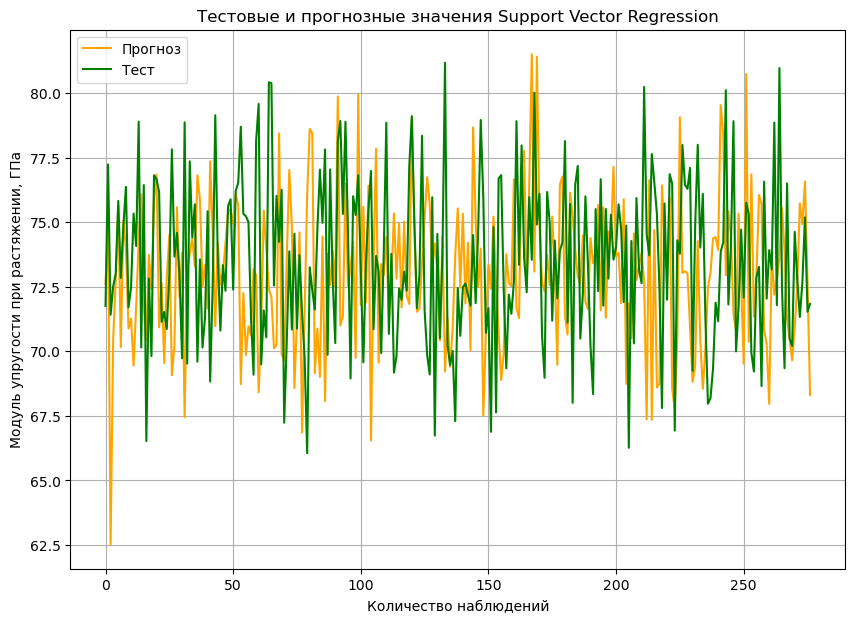

In [12]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [13]:
# Метод случайного леса - Random Forest Regressor - 2

In [14]:
#построение модели и вузуализация метода случайный лес
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(x_train_2, y_train_2.values)
y2_pred_forest = rfr2.predict(x_test_2)
mae_rfr2 = mean_absolute_error(y2_pred_forest, y_test_2)
mse_rfr_elast2 = mean_squared_error(y_test_2,y2_pred_forest)
print('Random Forest Regressor Results Train:')
print("Test score: {:.2f}".format(rfr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Random Forest Regressor Results:')
print('RF_MAE: ', round(mean_absolute_error(y_test_2, y2_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y2_pred_forest)))
print('RF_MSE: {:.2f}'.format(mse_rfr_elast2))
print("RF_RMSE: {:.2f}".format (np.sqrt(mse_rfr_elast2)))
print("Test score: {:.2f}".format(rfr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Random Forest Regressor Results Train:
Test score: 0.40
Random Forest Regressor Results:
RF_MAE:  3
RF_MAPE: 0.04
RF_MSE: 10.47
RF_RMSE: 3.24
Test score: -0.06


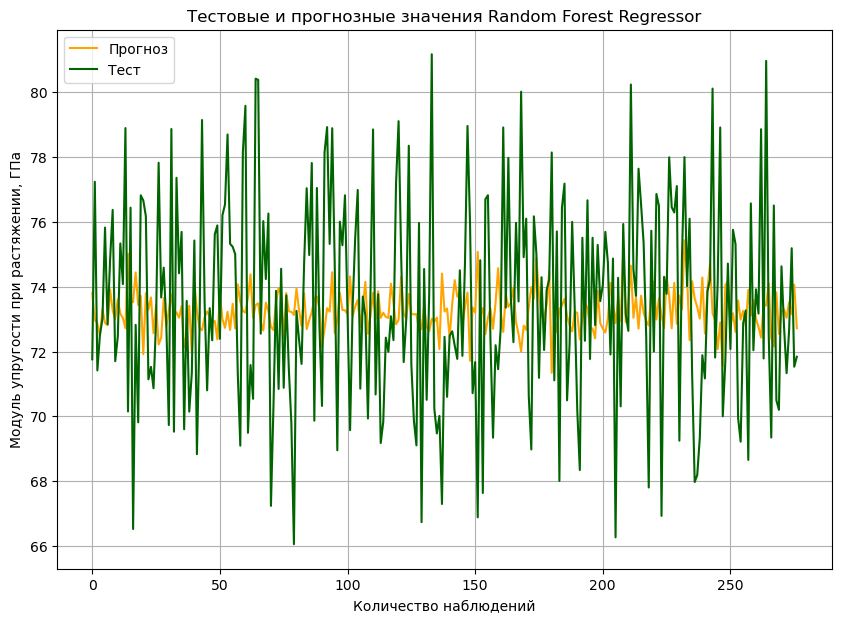

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y2_pred_forest, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [16]:
#Метод линейной регрессии - Linear Regression - 3

In [17]:
#построение модели и вузуализация Линейной регрессии
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train_2)
y_pred_lr2 = lr2.predict(x_test_2)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_2)
mse_lin_elast2 = mean_squared_error(y_test_2, y_pred_lr2)
print('Linear Regression Results Train:') # Скор для тренировочной выборки
print("Test score: {:.2f}".format(lr2.score(x_train_2, y_train_2)))
print('Linear Regression Results:')    
print('lr_MAE: ', round(mean_absolute_error(y_test_2, y_pred_lr2)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_lr2)))
print('lr_MSE: {:.2f}'.format(mse_lin_elast2))
print("lr_RMSE: {:.2f}".format (np.sqrt(mse_lin_elast2)))
print("Test score: {:.2f}".format(lr2.score(x_test_2, y_test_2))) # Скор для тестовой выборки

Linear Regression Results Train:
Test score: 0.02
Linear Regression Results:
lr_MAE:  3
lr_MAPE: 0.04
lr_MSE: 10.18
lr_RMSE: 3.19
Test score: -0.03


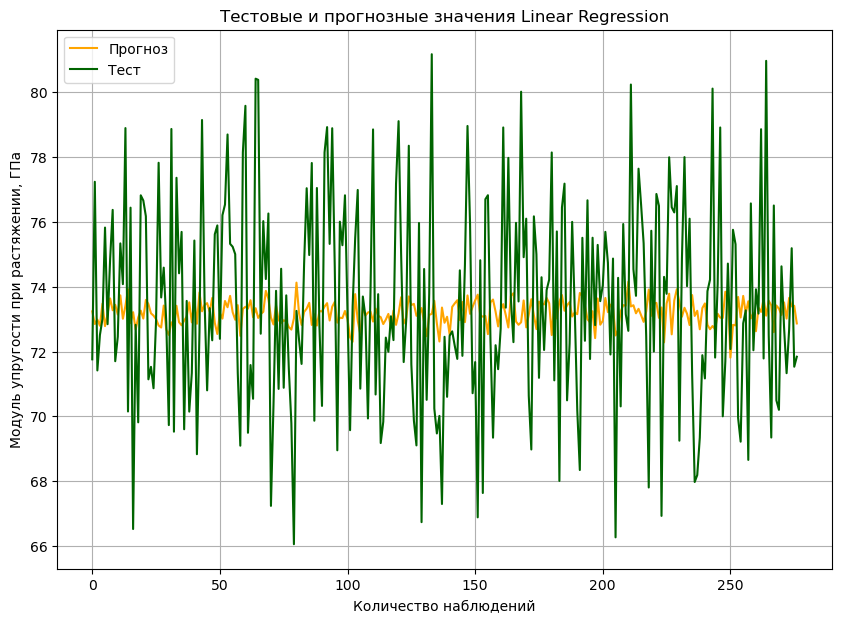

In [18]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

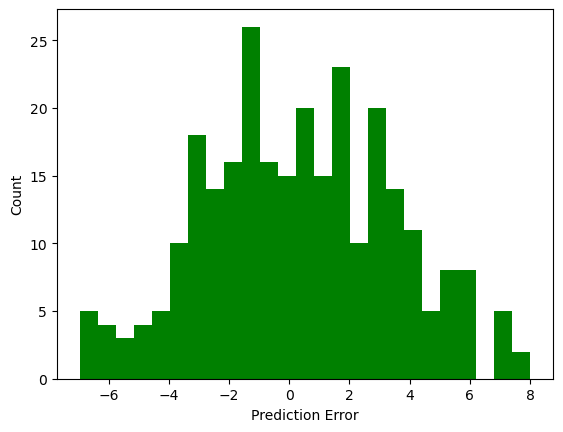

In [19]:
error = y_test_2 - y_pred_lr2
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [20]:
gbr2 = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr2.fit(x_train_2, np.ravel(y_train_2))
y_pred_gbr2 = gbr2.predict(x_test_2)
mae_gbr2 = mean_absolute_error(y_pred_gbr2, y_test_2)
mse_gbr_elast2 = mean_squared_error(y_test_2,y_pred_gbr2)
print('Gradient Boosting Regressor Results Train:')
print("Test score: {:.2f}".format(gbr2.score(x_train_2, y_train_2))) # Скор для тренировочной выборки
print('Gradient Boosting Regressor Results:')
print('GBR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_gbr2)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_gbr2)))
print('GBR_MSE: {:.2f}'.format(mse_gbr_elast2))
print("GBR_RMSE: {:.2f}".format (np.sqrt(mse_gbr_elast2)))
print("Test score: {:.2f}".format(gbr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Gradient Boosting Regressor Results Train:
Test score: 0.53
Gradient Boosting Regressor Results:
GBR_MAE:  3
GBR_MAPE: 0.04
GBR_MSE: 10.83
GBR_RMSE: 3.29
Test score: -0.09


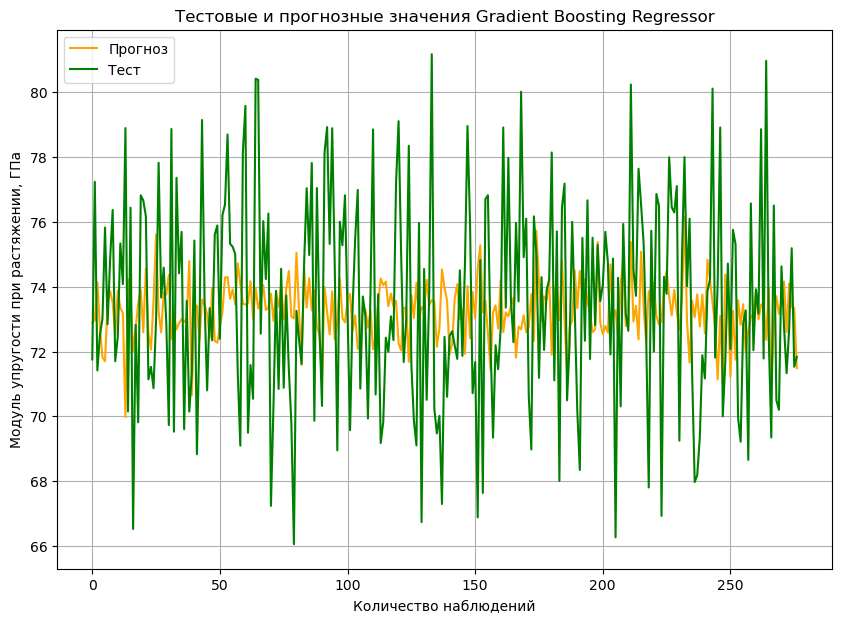

In [21]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr2, label = "Прогноз", color = "orange")
plt.plot(y_test_2.values, label = "Тест", color = "green")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [22]:
# Метод К ближайших соседей - K Neighbors Regressor - 5
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_knn2 = knn2.predict(x_test_2)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_2)
mse_knn_elast2 = mean_squared_error(y_test_2,y_pred_knn2)
print('K Neighbors Regressor  Results Train:')
print("Test score: {:.2f}".format(knn2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_2, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_knn2)))
print('KNN_MSE: {:.2f}'.format(mse_knn_elast2))
print("KNN_RMSE: {:.2f}".format (np.sqrt(mse_knn_elast2)))
print("Test score: {:.2f}".format(knn2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

K Neighbors Regressor  Results Train:
Test score: 0.24
K Neighbors Regressor  Results:
KNN_MAE:  3
KNN_MAPE: 0.04
KNN_MSE: 11.88
KNN_RMSE: 3.45
Test score: -0.20


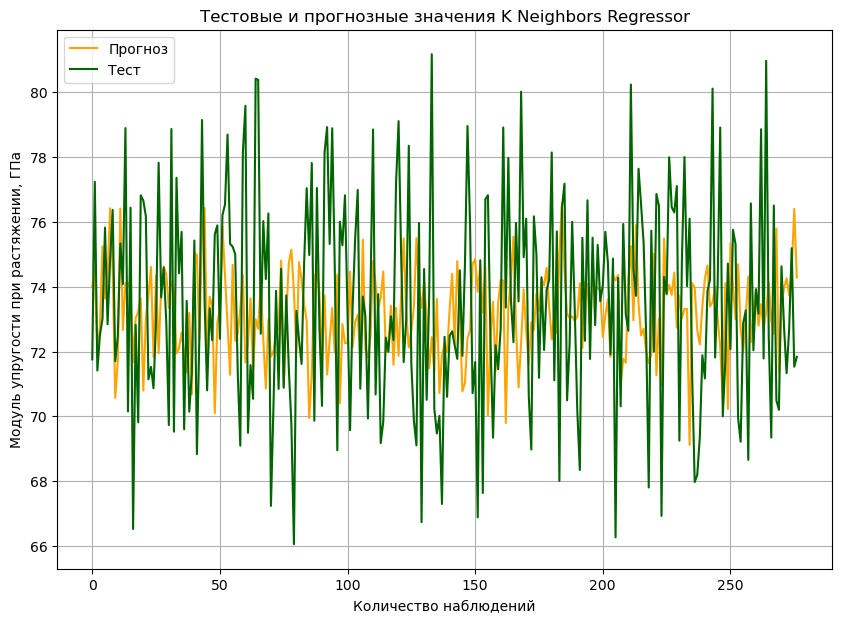

In [23]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

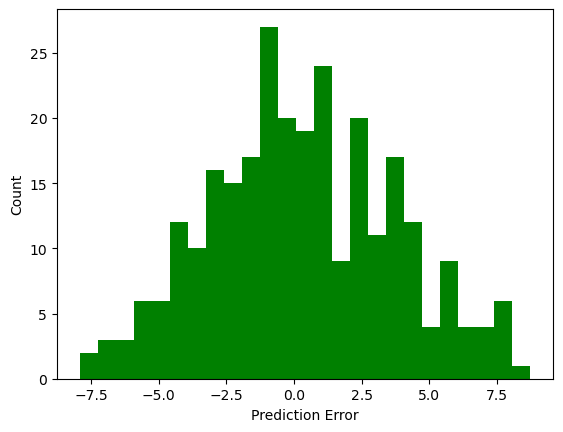

In [24]:
#Визуализация гистограммы распределения ошибки
error = y_test_2 - y_pred_knn2
plt.hist(error, bins = 25, color = "g")
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [25]:
#Деревья решений - Decision Tree Regressor - 6

dtr2 = DecisionTreeRegressor()
dtr2.fit(x_train_2, y_train_2.values)
y_pred_dtr2 = dtr2.predict(x_test_2)
mae_dtr2 = mean_absolute_error(y_pred_dtr2, y_test_2)
mse_dtr_elast2 = mean_squared_error(y_test_2,y_pred_dtr2)
print('Decision Tree Regressor Results Train:')
print("Test score: {:.2f}".format(dtr2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Decision Tree Regressor Results:')
print('DTR_MAE: ', round(mean_absolute_error(y_test_2, y_pred_dtr2)))
print('DTR_MSE: {:.2f}'.format(mse_dtr_elast2))
print("DTR_RMSE: {:.2f}".format (np.sqrt(mse_dtr_elast2)))
print('DTR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_dtr2)))
print("Test score: {:.2f}".format(dtr2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Decision Tree Regressor Results Train:
Test score: 1.00
Decision Tree Regressor Results:
DTR_MAE:  4
DTR_MSE: 19.56
DTR_RMSE: 4.42
DTR_MAPE: 0.05
Test score: -0.97


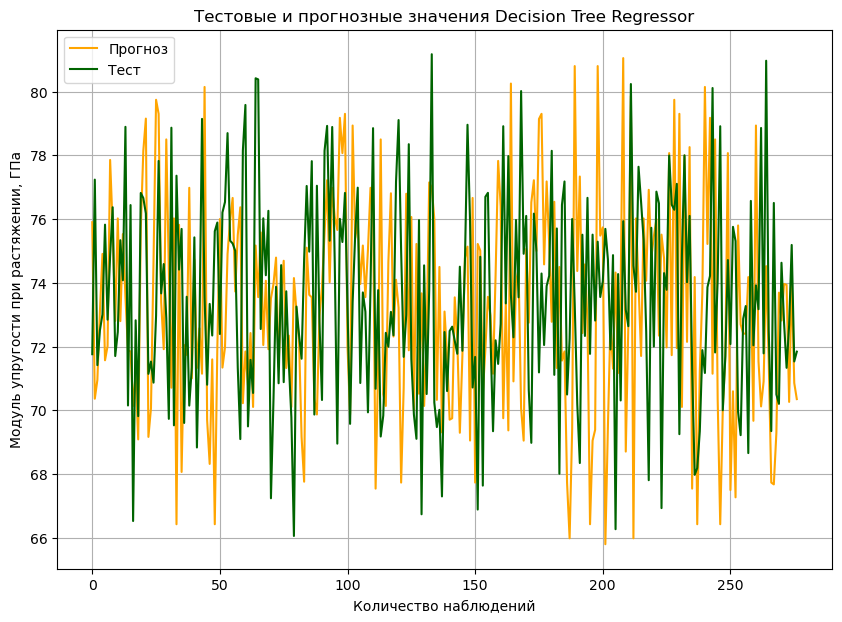

In [26]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Decision Tree Regressor")
plt.plot(y_pred_dtr2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [27]:
# Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor - 7 

sdg2 = SGDRegressor()
sdg2.fit(x_train_2, y_train_2)
y_pred_sdg2 = sdg2.predict(x_test_2)
mae_sdg2 = mean_absolute_error(y_pred_sdg2, y_test_2)
mse_sdg_elast2 = mean_squared_error(y_test_2,y_pred_sdg2)
print('Stochastic Gradient Descent Regressor Results Train:')
print("Test score: {:.2f}".format(sdg2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Stochastic Gradient Descent Regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_sdg2)))
print('SGD_MSE: {:.2f}'.format(mse_sdg_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_sdg_elast2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_sdg2)))
print("Test score: {:.2f}".format(sdg2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Stochastic Gradient Descent Regressor Results Train:
Test score: -0.02
Stochastic Gradient Descent Regressor Results:
SGD_MAE:  3
SGD_MSE: 10.29
SGD_RMSE: 3.21
SGD_MAPE: 0.04
Test score: -0.04


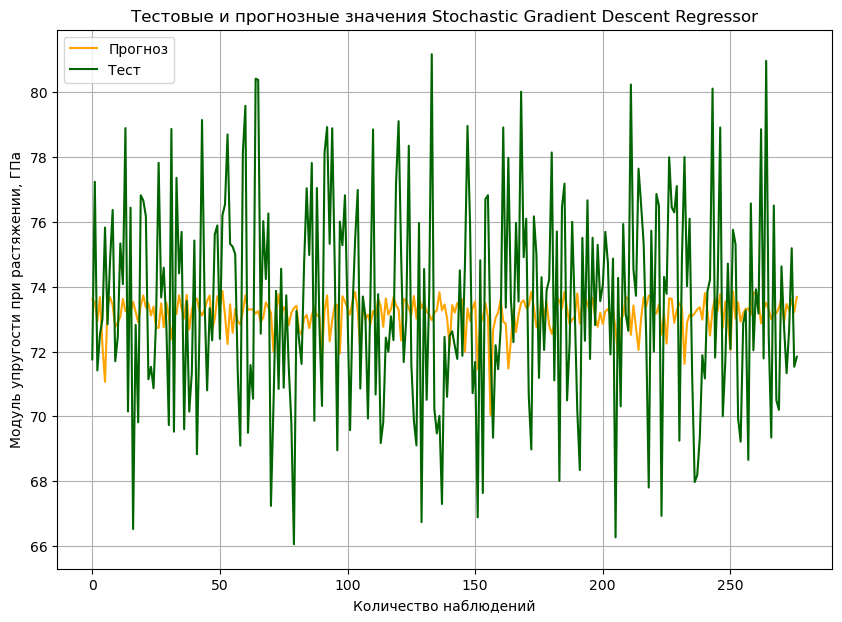

In [28]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Stochastic Gradient Descent Regressor")
plt.plot(y_pred_sdg2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [29]:
# Многослойный перцептрон - Multi-layer Perceptron regressor - 8

mlp2 = MLPRegressor(random_state = 1, max_iter = 500)
mlp2.fit(x_train_2, y_train_2)
y_pred_mlp2 = mlp2.predict(x_test_2)
mae_mlp2 = mean_absolute_error(y_pred_mlp2, y_test_2)
mse_mlp_elast2 = mean_squared_error(y_test_2,y_pred_mlp2)
print('Multi-layer Perceptron regressor Results Train:')
print("Test score: {:.2f}".format(mlp2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Multi-layer Perceptron regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_mlp2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_mlp2)))
print('SGD_MSE: {:.2f}'.format(mse_mlp_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_mlp_elast2)))
print("Test score: {:.2f}".format(mlp2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Multi-layer Perceptron regressor Results Train:
Test score: -0.77
Multi-layer Perceptron regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.05
SGD_MSE: 17.30
SGD_RMSE: 4.16
Test score: -0.75


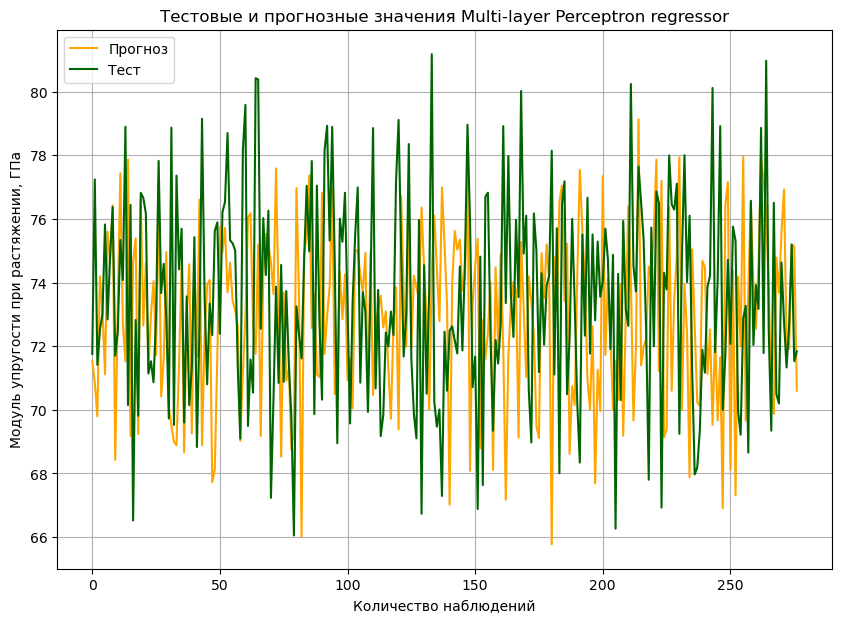

In [30]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Multi-layer Perceptron regressor")
plt.plot(y_pred_mlp2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [31]:
# Лассо регрессия - the Lasso - 9

clf2 = linear_model.Lasso(alpha = 0.1)
clf2.fit(x_train_2, y_train_2)
y_pred_clf2 = clf2.predict(x_test_2)
mae_clf2 = mean_absolute_error(y_pred_clf2, y_test_2)
mse_clf_elast2 = mean_squared_error(y_test_2,y_pred_clf2)
print('Lasso regressor Results Train:')
print("Test score: {:.2f}".format(clf2.score(x_train_2, y_train_2)))# Скор для тренировочной выборки
print('Lasso regressor Results:')
print('SGD_MAE: ', round(mean_absolute_error(y_test_2, y_pred_clf2)))
print('SGD_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_2, y_pred_clf2)))
print('SGD_MSE: {:.2f}'.format(mse_clf_elast2))
print("SGD_RMSE: {:.2f}".format (np.sqrt(mse_clf_elast2)))
print("Test score: {:.2f}".format(clf2.score(x_test_2, y_test_2)))# Скор для тестовой выборки

Lasso regressor Results Train:
Test score: 0.00
Lasso regressor Results:
SGD_MAE:  3
SGD_MAPE: 0.04
SGD_MSE: 10.00
SGD_RMSE: 3.16
Test score: -0.01


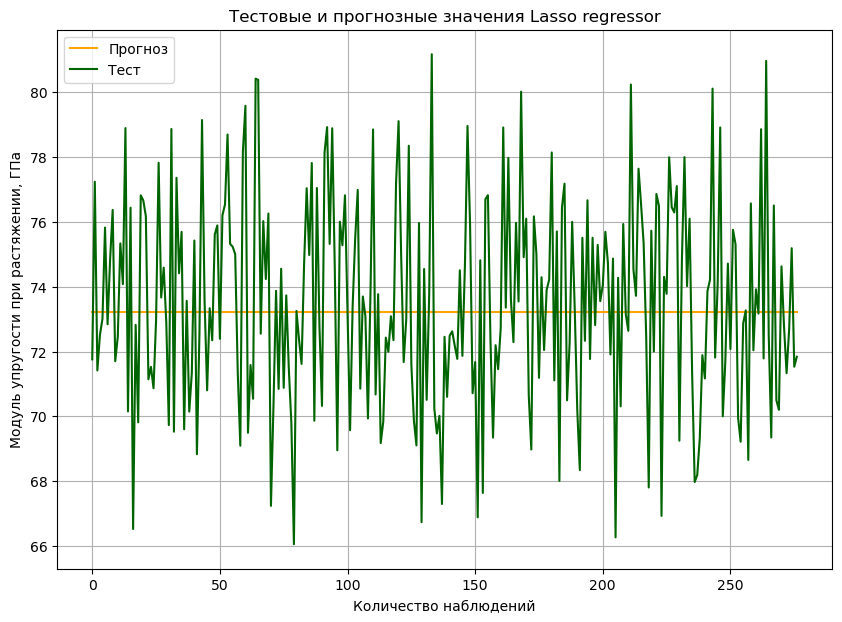

In [32]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Lasso regressor")
plt.plot(y_pred_clf2, label = "Прогноз", color = 'orange')
plt.plot(y_test_2.values, label = "Тест", color = 'darkgreen')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [33]:
#сравним наши модели по метрике МАЕ
mae_df2 = {'Регрессор': ['Support Vector', 'RandomForest', 'Linear Regression', 'GradientBoosting', 'KNeighbors', 'DecisionTree', 'SGD', 'MLP', 'Lasso'], 'MAE': [mae_svr2, mae_rfr2, mae_lr2, mae_gbr2, mae_knr2, mae_dtr2, mae_sdg2, mae_mlp2, mae_clf2]} 
mae_df2 = pd.DataFrame(mae_df2)

In [34]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# модели случайного леса - Random Forest Regressor - 2

parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['sqrt'],
              'criterion': ['squared_error'] }
grid21 = GridSearchCV(estimator = rfr2, param_grid = parametrs, cv=10)
grid21.fit(x_train_2, y_train_2)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=15,
                                             random_state=33),
             param_grid={'criterion': ['squared_error'], 'max_depth': [9, 15],
                         'max_features': ['sqrt'], 'n_estimators': [200, 300]})

In [35]:
grid21.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [36]:
#Выводим гиперпараметры для оптимальной модели
print(grid21.best_estimator_)
knr_u = grid21.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {round(knr_u.score(x_test_2, y_test_2), 3)}')

RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=300,
                      random_state=33)
R2-score RFR для модуля упругости при растяжении: -0.035


In [37]:
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr21_grid = RandomForestRegressor(n_estimators=300, criterion='squared_error', max_depth=9, max_features='sqrt')
#Обучаем модель
rfr21_grid.fit(x_train_2, y_train_2)

predictions_rfr21_grid = rfr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_rfr21_grid = mean_absolute_error(predictions_rfr21_grid, y_test_2)
mae_rfr21_grid

2.6104630140618386

In [38]:
new_row_in_mae_df = {'Регрессор': 'RandomForest1_GridSearchCV', 'MAE': mae_rfr21_grid} 

# Создаем DataFrame из новой строки и объединяем с существующим
mae_df2 = pd.concat([mae_df2, pd.DataFrame([new_row_in_mae_df])], ignore_index=True)
mae_df2

,Регрессор,MAE
0,Support Vector,3.467880
1,RandomForest,2.620202
2,Linear Regression,2.612273
3,GradientBoosting,2.652419
4,KNeighbors,2.789287
5,DecisionTree,3.525147
6,SGD,2.613239
7,MLP,3.338349
8,Lasso,2.580193
9,RandomForest1_GridSearchCV,2.610463


In [39]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
# Метода К ближайших соседей - K Neighbors Regressor - 5
knn21 = KNeighborsRegressor()
knn21_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(knn21, knn21_params, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
knn_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'algorithm': 'auto', 'n_neighbors': 269, 'weights': 'uniform'}

In [40]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs121 = gs21.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {round(gs121.score(x_test_2, y_test_2), 3)}')

KNeighborsRegressor(n_neighbors=269)
R2-score KNR для модуля упругости при растяжении: -0.013


In [41]:
#подставим оптимальные гиперпараметры в нашу модель метода к ближайших соседей
knn21_grid = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, weights = 'distance')
#Обучаем модель
knn21_grid.fit(x_train_2, y_train_2)

predictions_knn21_grid = knn21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_knn21_grid = mean_absolute_error(predictions_knn21_grid, y_test_2)
mae_knn21_grid

2.74534355290066

In [42]:
new_row_in_mae_df = {'Регрессор': 'KNeighbors1_GridSearchCV', 'MAE': mae_knn21_grid} 

mae_df2 = pd.concat([mae_df2, pd.DataFrame([new_row_in_mae_df])], ignore_index=True)
mae_df2

,Регрессор,MAE
0,Support Vector,3.467880
1,RandomForest,2.620202
2,Linear Regression,2.612273
3,GradientBoosting,2.652419
4,KNeighbors,2.789287
5,DecisionTree,3.525147
6,SGD,2.613239
7,MLP,3.338349
8,Lasso,2.580193
9,RandomForest1_GridSearchCV,2.610463


In [43]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой, количество блоков равно 10 (cv = 10), для 
#Деревья решений - Decision Tree Regressor - 6
criterion21 = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter21 = ['best', 'random']
max_depth21 = [3,5,7,9,11]
min_samples_leaf21 = [100,150,200]
min_samples_split21 = [200,250,300]
max_features21 = ['auto', 'sqrt', 'log2']
param_grid21 = {'criterion': criterion21,
               'splitter': splitter21,
               'max_depth': max_depth21,
               'min_samples_split': min_samples_split21,
               'min_samples_leaf': min_samples_leaf21,
               'max_features': max_features21}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
# Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.
gs21 = GridSearchCV(dtr2, param_grid21, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs21.fit(x_train_2, y_train_2)
dtr_21 = gs21.best_estimator_
gs21.best_params_

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 200,
 'min_samples_split': 200,
 'splitter': 'best'}

In [44]:
#Выводим гиперпараметры для оптимальной модели
print(gs21.best_estimator_)
gs211 = gs21.best_estimator_
print(f'R2-score DTR для модуля упругости при растяжении: {round(gs211.score(x_test_2, y_test_2), 3)}')

DecisionTreeRegressor(max_depth=7, max_features='log2', min_samples_leaf=200,
                      min_samples_split=200)
R2-score DTR для модуля упругости при растяжении: -0.018


In [45]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr21_grid = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, max_features='sqrt',
                      min_samples_leaf=100, min_samples_split=200)
#Обучаем модель
dtr21_grid.fit(x_train_2, y_train_2)

predictions_dtr21_grid = dtr21_grid.predict(x_test_2)
#Оцениваем точность на тестовом наборе
mae_dtr21_grid = mean_absolute_error(predictions_dtr21_grid, y_test_2)
mae_dtr21_grid

2.599054526502433

In [46]:
new_row_in_mae_df = {'Регрессор': 'DecisionTree1_GridSearchCV', 'MAE': mae_dtr21_grid} 

mae_df2 = pd.concat([mae_df2, pd.DataFrame([new_row_in_mae_df])], ignore_index=True)
mae_df2

,Регрессор,MAE
0,Support Vector,3.467880
1,RandomForest,2.620202
2,Linear Regression,2.612273
3,GradientBoosting,2.652419
4,KNeighbors,2.789287
5,DecisionTree,3.525147
6,SGD,2.613239
7,MLP,3.338349
8,Lasso,2.580193
9,RandomForest1_GridSearchCV,2.610463


In [47]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('regressor', SVR())])
param_grid2 = [
{'regressor': [SVR()], 'preprocessing': [StandardScaler(), MinMaxScaler(), None],
'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'regressor': [RandomForestRegressor(n_estimators=100)],
'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [LinearRegression()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [GradientBoostingRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [KNeighborsRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [DecisionTreeRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [SGDRegressor()], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [MLPRegressor(random_state=1, max_iter=500)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},
{'regressor': [linear_model.Lasso(alpha=0.1)], 'preprocessing':  [StandardScaler(), MinMaxScaler(), None]},]
grid2 = GridSearchCV(pipe2, param_grid2, cv=10)
grid2.fit(x_train_2, np.ravel(y_train_2))
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Наилучшее значение правильности перекрестной проверки: {:.2f}".format(grid2.best_score_))
print("Правильность на тестовом наборе: {:.2f}".format(grid2.score(x_test_2, y_test_2)))

Наилучшие параметры:
{'preprocessing': MinMaxScaler(), 'regressor': SVR(), 'regressor__C': 10, 'regressor__gamma': 100}

Наилучшее значение правильности перекрестной проверки: -0.01
Правильность на тестовом наборе: -0.01


In [48]:
print("Наилучшая модель:\n{}".format(grid2.best_estimator_))

Наилучшая модель:
Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('regressor', SVR(C=10, gamma=100))])


После обучения моделей была проведена оценка точности этих моделей на обучающей и тестовых выборках. В качестве параметра оценки модели использовалась средняя абсолютная ошибка (MAE). Обе модели даже на тренировочном датасете не смогли обучиться и приблизиться к исходным данным. Поэтому ошибка на тестовом датасете выше.

# Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [78]:
# Сформируем входы и выход для модели

tv = df['Соотношение матрица-наполнитель']
tr_v = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 42)

In [50]:
# Нормализуем данные

x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [60]:
#Определяем функцию create_model для РЕГРЕССИИ

def create_regression_model():
    """Создает модель для РЕГРЕССИИ (1 выход)"""
    model = Sequential()
    model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))  # ТОЛЬКО 1 выход для регрессии!
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',      # Среднеквадратичная ошибка
        metrics=['mae']  # Средняя абсолютная ошибка
    )
    return model

In [61]:
# Создаем обертку для РЕГРЕССИИ

class KerasRegressor(BaseEstimator):
    def __init__(self, build_fn=None, batch_size=32, epochs=100, verbose=0):
        self.build_fn = build_fn
        self.batch_size = batch_size
        self.epochs = epochs
        self.verbose = verbose
        self.model_ = None
        
    def fit(self, X, y):
        self.model_ = self.build_fn()
        
        self.model_.fit(
            X, y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            validation_split=0.2
        )
        return self
    
    def predict(self, X):
        return self.model_.predict(X, verbose=0).flatten()
    
    def score(self, X, y):
        # Для регрессии используем R² score
        predictions = self.predict(X)
        return r2_score(y, predictions)

In [64]:
# GridSearchCV для РЕГРЕССИИ

print("\n" + "="*60)
print("GRIDSEARCHCV ДЛЯ РЕГРЕССИИ:")
print("="*60)

# Создаем модель
model = KerasRegressor(build_fn=create_regression_model, verbose=0)

# Параметры (уменьшим для скорости)
batch_size = [10, 20]  # было [4, 10, 20, 50, 100]
epochs = [20, 50]      # было [10, 50, 100, 200, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

print(f"Параметры: {param_grid}")
print(f"Комбинаций: {len(batch_size) * len(epochs)}")

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # было 10
    scoring='r2',  # R² для регрессии
    verbose=1,
    n_jobs=1
)

print("\nЗапускаем GridSearchCV...")
grid_result = grid.fit(x_train, y_train)


GRIDSEARCHCV ДЛЯ РЕГРЕССИИ:
Параметры: {'batch_size': [10, 20], 'epochs': [20, 50]}
Комбинаций: 4

Запускаем GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [65]:
# Результаты

print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ:")
print("="*60)

print(f"\n✅ Лучший R²: {grid_result.best_score_:.4f}")
print(f"✅ Лучшие параметры: {grid_result.best_params_}")

# Тестируем лучшую модель
best_model = grid_result.best_estimator_
y_test_pred = best_model.predict(x_test)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n📊 На тестовых данных:")
print(f"  R²: {test_r2:.4f}")
print(f"  MAE: {test_mae:.4f}")


РЕЗУЛЬТАТЫ:

✅ Лучший R²: -23.4944
✅ Лучшие параметры: {'batch_size': 10, 'epochs': 50}

📊 На тестовых данных:
  R²: -3.6187
  MAE: 1.3160


In [67]:
print("="*60)
print("ПОСТРОЕНИЕ ОКОНЧАТЕЛЬНОЙ МОДЕЛИ")
print("="*60)

# Функция создания модели с заданными параметрами
def create_model(lyrs=[128, 64, 16, 3], dr=0.05):
    """
    Создает нейронную сеть для регрессии
    
    Параметры:
    lyrs - список количества нейронов в каждом слое
    dr - dropout rate
    """
    model = Sequential()
    
    # Добавляем слои
    for i, neurons in enumerate(lyrs):
        if i == 0:
            # Первый слой с указанием input_dim
            model.add(Dense(neurons, input_dim=x_train.shape[1], activation='relu'))
        else:
            model.add(Dense(neurons, activation='relu'))
        
        # Добавляем Dropout после каждого слоя (кроме последнего)
        if i < len(lyrs) - 1:
            model.add(Dropout(dr))
    
    # Выходной слой для РЕГРЕССИИ (1 нейрон, линейная активация)
    model.add(Dense(1, activation='linear'))
    
    # Компиляция для регрессии
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',      # Среднеквадратичная ошибка
        metrics=['mae']  # Средняя абсолютная ошибка
    )
    
    return model

ПОСТРОЕНИЕ ОКОНЧАТЕЛЬНОЙ МОДЕЛИ


In [68]:
# Создаем модель 
model = create_model(lyrs=[128, 64, 16, 3], dr=0.05)

print("\n✅ Модель создана!")
print("\n" + "="*60)
print("СВОДКА МОДЕЛИ:")
print("="*60)


✅ Модель создана!

СВОДКА МОДЕЛИ:


In [69]:
# Выводим информацию о модели
model.summary()


Model: "sequential_264"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_792 (Dense)                    │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_264 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_793 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_265 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_794 (Dense)                    │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_266 (Dropout)                │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_795 (Dense)                    │ (None, 3)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_796 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,271 (44.03 KB)

 Trainable params: 11,271 (44.03 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
print("\n" + "="*60)
print("АРХИТЕКТУРА МОДЕЛИ:")
print("="*60)

# Выводим архитектуру по слоям
print(f"\nАрхитектура: {[x_train.shape[1]] + [128, 64, 16, 3] + [1]}")
print("Входной слой:", x_train.shape[1], "признаков")
print("Скрытые слои: 128 → 64 → 16 → 3 нейронов")
print("Выходной слой: 1 нейрон (регрессия)")
print("Dropout: 0.05")
print("Активация: ReLU (скрытые), Linear (выходной)")
print("Оптимизатор: Adam (lr=0.001)")
print("Функция потерь: MSE")
print("Метрика: MAE")


АРХИТЕКТУРА МОДЕЛИ:

Архитектура: [14, 128, 64, 16, 3, 1]
Входной слой: 14 признаков
Скрытые слои: 128 → 64 → 16 → 3 нейронов
Выходной слой: 1 нейрон (регрессия)
Dropout: 0.05
Активация: ReLU (скрытые), Linear (выходной)
Оптимизатор: Adam (lr=0.001)
Функция потерь: MSE
Метрика: MAE


In [72]:
# ОБУЧЕНИЕ МОДЕЛИ
# ==============================================
print("\n" + "="*60)
print("ОБУЧЕНИЕ МОДЕЛИ")
print("="*60)

# Используем лучшие параметры из GridSearch
batch_size = 10
epochs = 50

print(f"\nПараметры обучения:")
print(f"  Batch size: {batch_size}")
print(f"  Epochs: {epochs}")
print(f"  Размер тренировочных данных: {x_train.shape}")



ОБУЧЕНИЕ МОДЕЛИ

Параметры обучения:
  Batch size: 10
  Epochs: 50
  Размер тренировочных данных: (645, 14)


In [73]:
# Обучаем модель
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split=0.2
)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 10.8762 - mae: 2.3495 - val_loss: 1.3322 - val_mae: 0.8724
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4957 - mae: 1.2570 - val_loss: 0.9072 - val_mae: 0.7529
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8030 - mae: 1.0419 - val_loss: 0.8768 - val_mae: 0.7685
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6342 - mae: 1.0011 - val_loss: 0.9034 - val_mae: 0.7816
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9518 - mae: 0.9839 - val_loss: 0.9097 - val_mae: 0.7619
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2755 - mae: 0.8777 - val_loss: 0.8978 - val_mae: 0.7767
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3823 - mae: 0.9387 - val_loss: 0.8623 - val_mae: 0.7524
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2833 - mae: 0.8760 - val_loss: 1.0324 - val_mae: 0.8556
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0719 - mae

In [74]:
# ОЦЕНКА МОДЕЛИ
# ==============================================
print("\n" + "="*60)
print("ОЦЕНКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ")
print("="*60)

# Предсказания
y_train_pred = model.predict(x_train, verbose=0).flatten()
y_test_pred = model.predict(x_test, verbose=0).flatten()

# Метрики
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"\n📊 МЕТРИКИ МОДЕЛИ:")
print(f"{'':<15} {'Train':<12} {'Test':<12}")
print("-"*45)
print(f"{'R²':<15} {train_r2:<12.4f} {test_r2:<12.4f}")
print(f"{'MAE':<15} {train_mae:<12.4f} {test_mae:<12.4f}")
print(f"{'MSE':<15} {train_mse:<12.4f} {test_mse:<12.4f}")
print(f"{'RMSE':<15} {train_rmse:<12.4f} {test_rmse:<12.4f}")


ОЦЕНКА МОДЕЛИ НА ТЕСТОВЫХ ДАННЫХ

📊 МЕТРИКИ МОДЕЛИ:
                Train        Test        
---------------------------------------------
R²              -0.0110      -0.0512     
MAE             0.7307       0.7407      
MSE             0.8163       0.8250      
RMSE            0.9035       0.9083      


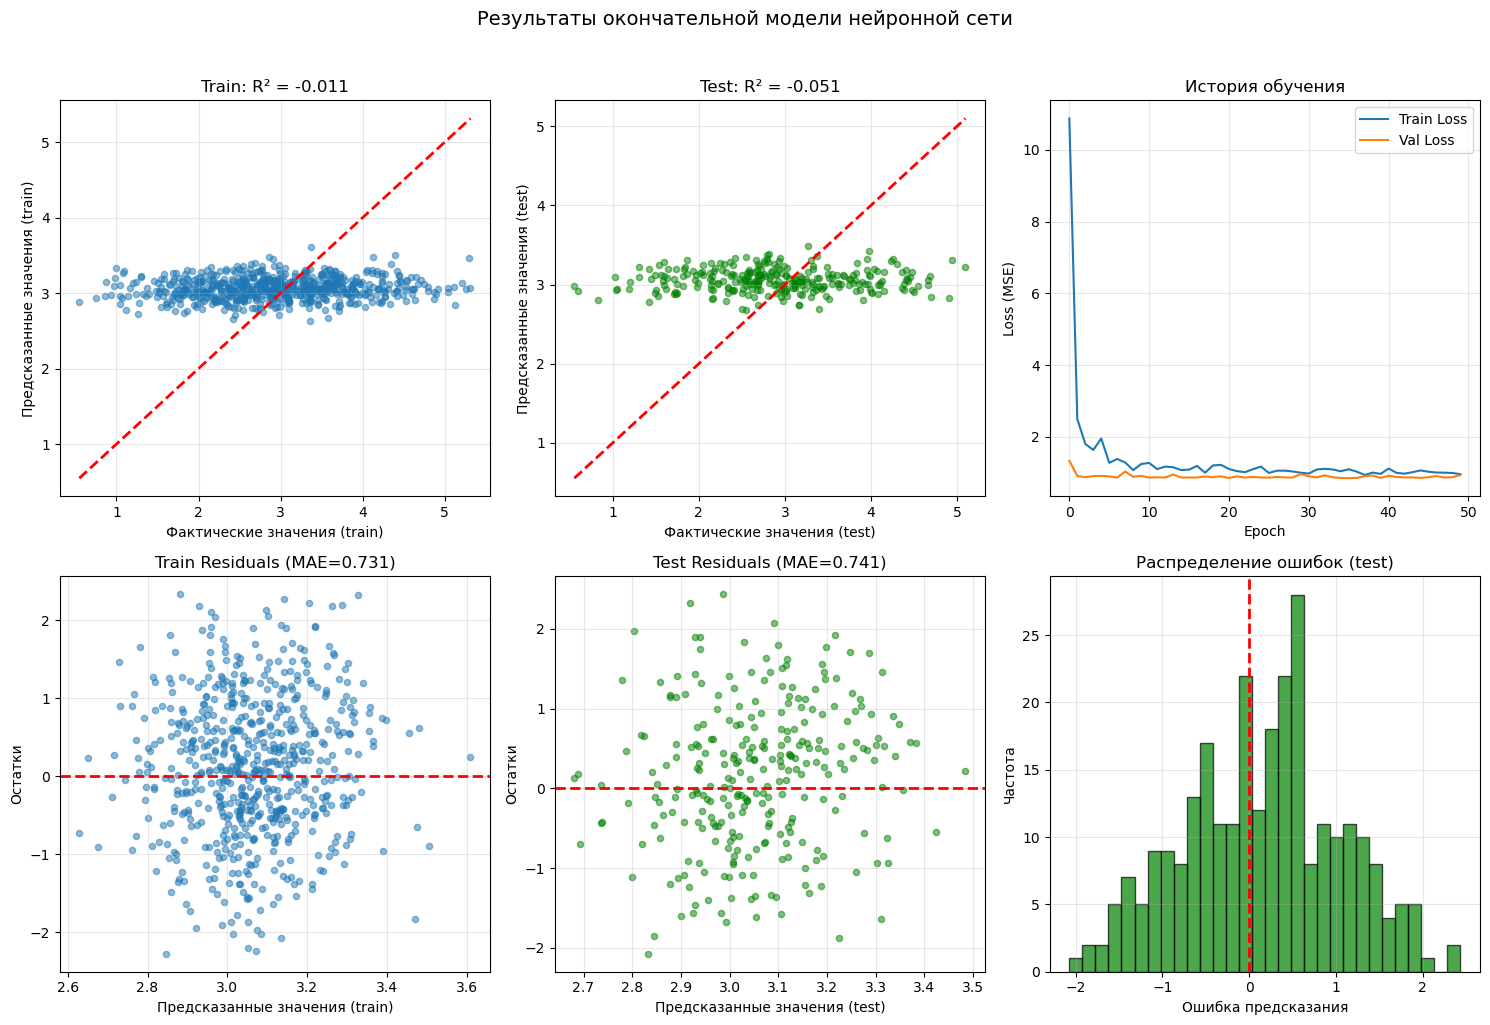

In [75]:
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
# ==============================================
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Фактические vs предсказанные (train)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Фактические значения (train)')
axes[0, 0].set_ylabel('Предсказанные значения (train)')
axes[0, 0].set_title(f'Train: R² = {train_r2:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# 2. Фактические vs предсказанные (test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Фактические значения (test)')
axes[0, 1].set_ylabel('Предсказанные значения (test)')
axes[0, 1].set_title(f'Test: R² = {test_r2:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# 3. История обучения (loss)
axes[0, 2].plot(history.history['loss'], label='Train Loss')
axes[0, 2].plot(history.history['val_loss'], label='Val Loss')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Loss (MSE)')
axes[0, 2].set_title('История обучения')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Остатки (train)
residuals_train = y_train_pred - y_train
axes[1, 0].scatter(y_train_pred, residuals_train, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Предсказанные значения (train)')
axes[1, 0].set_ylabel('Остатки')
axes[1, 0].set_title(f'Train Residuals (MAE={train_mae:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# 5. Остатки (test)
residuals_test = y_test_pred - y_test
axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Предсказанные значения (test)')
axes[1, 1].set_ylabel('Остатки')
axes[1, 1].set_title(f'Test Residuals (MAE={test_mae:.3f})')
axes[1, 1].grid(True, alpha=0.3)

# 6. Распределение ошибок
axes[1, 2].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 2].set_xlabel('Ошибка предсказания')
axes[1, 2].set_ylabel('Частота')
axes[1, 2].set_title('Распределение ошибок (test)')
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('Результаты окончательной модели нейронной сети', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [77]:
# СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# ==============================================
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ ДЛЯ СОХРАНЕНИЯ")
print("="*60)

# Для вашего DataFrame mae_df
mae_final = test_mae
r2_final = test_r2

print(f"\n📊 Итоговые метрики:")
print(f"  MAE на тестовых данных: {mae_final:.4f}")
print(f"  R² на тестовых данных: {r2_final:.4f}")

print(f"\n📝 Данные для добавления в mae_df:")
new_row = {
    'Регрессор': 'Keras_NN_Final',
    'MAE': mae_final,
    'R²': r2_final
}
print(f"  {new_row}")

# Сохраняем модель
try:
    model.save('final_neural_network_model.keras')
    print(f"\n💾 Модель сохранена как 'final_neural_network_model.keras'")
except:
    print("\n⚠️  Модель не сохранена (проблема с сохранением)")

print("\n" + "="*60)
print("✅ ОКОНЧАТЕЛЬНАЯ МОДЕЛЬ ПОСТРОЕНА И ОЦЕНЕНА")
print("="*60)


РЕЗУЛЬТАТЫ ДЛЯ СОХРАНЕНИЯ

📊 Итоговые метрики:
  MAE на тестовых данных: 0.7407
  R² на тестовых данных: -0.0512

📝 Данные для добавления в mae_df:
  {'Регрессор': 'Keras_NN_Final', 'MAE': 0.7407326507542127, 'R²': -0.05121833021452993}

💾 Модель сохранена как 'final_neural_network_model.keras'

✅ ОКОНЧАТЕЛЬНАЯ МОДЕЛЬ ПОСТРОЕНА И ОЦЕНЕНА


In [79]:
# Сконфигурируем другую модель, зададим слои
from tensorflow.keras.layers import Dense
model1 = tf.keras.Sequential([x_train_n, layers.Dense(128, activation='relu'),  
                                                 layers.Dense(128, activation='relu'), 
                                                 layers.Dense(128, activation='relu'), 
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(32, activation='relu'), 
                                                 layers.Dense(16, activation='relu'), 
                                                 layers.Dense(1)
                            ])

model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  
# Посмотрим на архитектуру модели

model1.summary()

Model: "sequential_265"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (645, 14)                   │              29 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_797 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_798 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_799 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_800 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_801 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_802 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_803 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_804 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 29 (120.00 B)

In [80]:
# Обучим модель

model_hist1 = model1.fit(
    x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 5.8900 - root_mean_squared_error: 2.4269 - val_loss: 2.0715 - val_root_mean_squared_error: 1.4393
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4607 - root_mean_squared_error: 1.2086 - val_loss: 1.2325 - val_root_mean_squared_error: 1.1102
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9531 - root_mean_squared_error: 0.9763 - val_loss: 1.1143 - val_root_mean_squared_error: 1.0556
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8884 - root_mean_squared_error: 0.9425 - val_loss: 1.1122 - val_root_mean_squared_error: 1.0546
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8434 - root_mean_squared_error: 0.9183 - val_loss: 1.0666 - val_root_mean_squared_error: 1.0328
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8124 - root_mean_squared_error: 0.9013 - val_loss: 1.0753 - val_root_mean_squared_error: 1.0370
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

In [81]:
model1.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3902 - root_mean_squared_error: 1.1791 


[1.3901760578155518, 1.179057240486145]

In [82]:
y_pred_model = model1.predict(x_test)

print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
Model Results:
Model_MAE:  1
Model_MAPE: 0.38
Test score: 1.39


In [83]:
# Посмотрим на потери модели

model_hist1.history

{'loss': [5.889969348907471,
  1.4606586694717407,
  0.9531054496765137,
  0.8883745670318604,
  0.8433558344841003,
  0.8124265074729919,
  0.7888758182525635,
  0.7903833985328674,
  0.7873291373252869,
  0.7530844807624817,
  0.6982905268669128,
  0.6751618385314941,
  0.6200879216194153,
  0.6292130947113037,
  0.5771834850311279,
  0.5196003913879395,
  0.4941164553165436,
  0.48225829005241394,
  0.46912863850593567,
  0.5006840825080872,
  0.3470306396484375,
  0.28526994585990906,
  0.23899345099925995,
  0.22630293667316437,
  0.1918855607509613,
  0.16109485924243927,
  0.15869539976119995,
  0.1561441421508789,
  0.12112677097320557,
  0.11495405435562134,
  0.09336954355239868,
  0.0707504153251648,
  0.06812048703432083,
  0.05698844790458679,
  0.05030222609639168,
  0.046497393399477005,
  0.03331603482365608,
  0.027021190151572227,
  0.030555954203009605,
  0.027005307376384735,
  0.034955114126205444,
  0.028331922367215157,
  0.021068081259727478,
  0.017329921945929

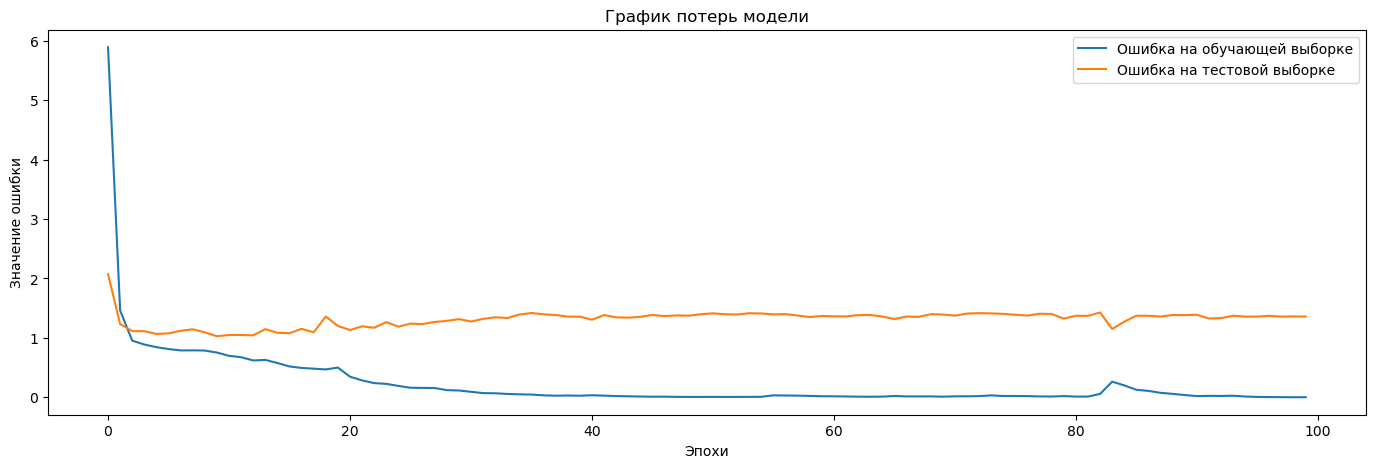

In [84]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist1):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist1.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist1.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


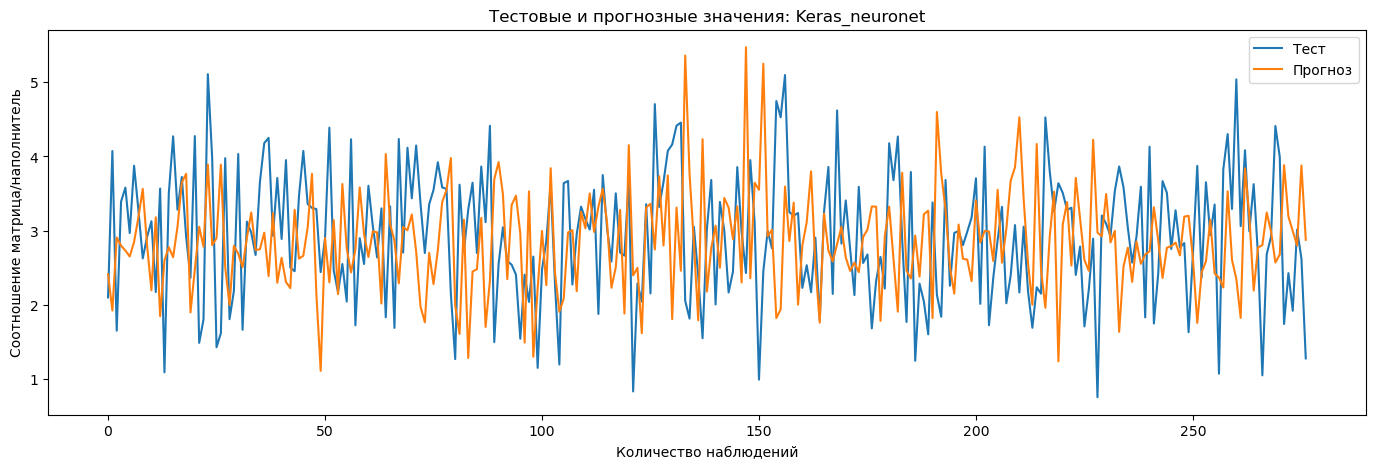

In [85]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [86]:
# оценка модели MSE
model1.evaluate(x_test, y_test, verbose = 1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3902 - root_mean_squared_error: 1.1791 


[1.3901760578155518, 1.179057240486145]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


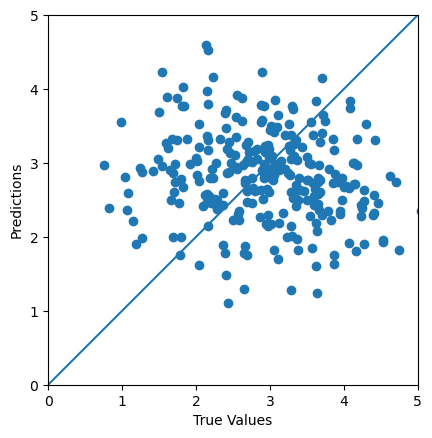

In [87]:
test_predictions = model1.predict(x_test).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Заключение.
Подводя итоги, стоит сказать, что машинное обучение в задачах моделей прогнозирования  – довольно сложный процесс, требующий не только навыков программирования, но и профессионального подхода к сфере самих композитных материалов. 
Необходимо понимать, на какие атрибуты нужно в первую очередь обратить внимание, чтобы суметь впоследствии грамотно и чётко спрогнозировать тот или иной признак. И, естественно, обладать всеми необходимыми знаниями, умениями и навыками для прогнозов и расчетов. 
В ходе работы был задействован дата-сет с реальными данными, произведена его подробная опись и сопутствующий анализ; построено множество разнообразных графиков; осуществлено разбиение данных на обучающую и тестовую выборки с использованием множества вспомогательных модулей из библиотеки SkLearn, которая во многом облегчила процесс машинного обучения и в целом была очень полезным инструментом в ходе работы над выпускной квалификационной работой. 
В рамках машинного обучения и поиска гиперпараметров были задействованы несколько алгоритмов: линейная регрессия, градиентный бустинг, К ближайших соседей,  деревья решений, стохастический градиентный спуск, многослойный перцептрон, лассо регрессия, а также опорные вектора и случайный лес. 
Поиск гиперпараметров осуществлялся при помощи таких методов, как «GridSearch». Для каждой из выборок были составлены классификационные отчёты, содержащие в себе основополагающие метрики, оценивающие качество проводимого обучения. 
В конечном итоге было представлено сравнение результатов оценок работы алгоритмов, а также различные графики и диаграммы, позволяющие наглядно оценить итоги проведенного обучения. 
Обучена нейронная сеть и разработано пользовательское приложение, предсказывающе вероятный прогноз по заданным параметрам. 
Что касается перспектив решения данной проблемы композитных материалов, то я думаю, что в таких случаях необходимо уделить больше внимания изучению самой проблемы композитных материалов, углубить знания по статистике и регрессиям, поискать иные варианты решений с данным датасетом.